**Problem:** 
* Belirli uğraşmalar sonucunda alınan bir eğitimin katma değer sağlanıp sağlanmadığı ölçülmek isteniyor.

**Detaylar:** 
* Bir departman bir konuda eğitim talep ediyor.
* Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor.
* Eğitim önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
* Eğitim sonrasında eğitimin sağladığı katma değer test ediliyor. 

In [6]:
import pandas as pd
import numpy as np

* H0 : Uö = Us
* H1 : Uö =! Us

In [2]:
oncesi=pd.DataFrame( [123, 119, 119,116, 123, 123, 121, 120, 117,118, 121, 121, 123, 119, 
121, 118, 124, 121, 125, 115, 115, 119, 118, 121, 117 , 117 , 120 , 120 , 
121, 117 , 118, 117 , 123, 118, 124, 121, 115, 118, 125, 115] ) 
sonrasi=pd.DataFrame( [118, 127, 122, 132, 129, 123, 129, 132, 128, 130, 128, 138, 140, 130, 
134, 134, 124, 140, 134, 129, 129, 138, 134, 124, 122, 126 , 133, 127 , 
130, 130, 130, 132, 117 , 130, 125, 129, 133, 120, 127 , 123] ) 


In [3]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [5]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [12]:
#BIRINCI VERİ SETİ
AYRIK = pd.concat([oncesi, sonrasi],axis=1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti:\n\n",AYRIK.head(),"\n\n")

#IKINCİ VERİ SETİ 
#ONCESI FLAG/TAG'INI OLUŞTURMA
GRUP_ONCESI=np.arange(len(oncesi))
GRUP_ONCESI=pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:]="ONCESI"
#FLAG VE ONCESI DEGERLERINI BİR ARAYA GETİRME
A = pd.concat([oncesi,GRUP_ONCESI],axis=1)
#SONRASI FLAG/TAG'INI OLUŞTURMA 
GRUP_SONRASI=np.arange(len(sonrasi))
GRUP_SONRASI=pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:]="SONRASI"

#FLAG VE ONCESI DEGERLERINI BİR ARAYA GETİRME
B = pd.concat([sonrasi,GRUP_SONRASI],axis=1)

#TUM VERİLERİ BİR ARAYA GETİRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#İSİMLENDİRME
BIRLIKTE.columns= ["PERFORMANS", "ONCESİ_SONRASI"]
print("'BIRLIKTE' Veri Seti:\n\n",BIRLIKTE.head(),"\n")


'AYRIK' Veri Seti:

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti:

    PERFORMANS ONCESİ_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



<AxesSubplot:xlabel='ONCESİ_SONRASI', ylabel='PERFORMANS'>

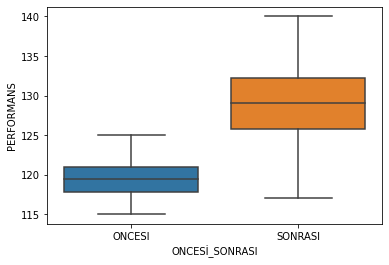

In [14]:
import seaborn as sns
sns.boxplot(x="ONCESİ_SONRASI",y="PERFORMANS",data=BIRLIKTE)

**Varsayım Kontrolleri**

In [16]:
from scipy.stats import shapiro

In [20]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

In [24]:
# HOhipotezi reddedemiyoruz (0.05 den büyük)

In [25]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

In [26]:
# HOhipotezi reddedemiyoruz (0.05 den büyük)

In [28]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [29]:
#varyansların homojenliği durumu sağlanmamaktadır.


**Hipotez Testi**

In [30]:
stats.ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [31]:
test_istatistiği, pvalue = stats.ttest_rel(AYRIK["ONCESI"],AYRIK["SONRASI"])
print('Test İstatistiği= %.4f, p2-değeri = %4f' % (test_istatistiği, pvalue))

Test İstatistiği= -9.2815, p2-değeri = 0.000000


In [32]:
#H0 hipotezi reddedilir. Eğitim işe yaramıştır

**Nonparametrik Bağımlı İki Örneklem Testi**

In [33]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [34]:
test_istatistiği, pvalue = stats.wilcoxon(AYRIK["ONCESI"],AYRIK["SONRASI"])
print('Test İstatistiği= %.4f, p2-değeri = %4f' % (test_istatistiği, pvalue))

Test İstatistiği= 15.0000, p2-değeri = 0.000000
